In [60]:
import tweepy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

consumer_key = "4bX3XVDXp5gwnZ2EabJEWqPsg"
consumer_secret = "DcjBnUpQJf3xl0H9zWdQhq4kbdQC3tTOSD2lck9jpc7sIw50St"
access_token = "1031618011440902145-4qHdPf11YpDgYEmMBH7UKuxYcQ5VRH"
access_token_secret = "2DuohSS4isGLbphb0z7rsPWh9aQAtA1tH79aB3A3n6Dbu"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [61]:
sentiments = []

target_users = ("@BBC","@CBS", "@CNN", "@Fox", "@NYTimes")
for user in target_users:

    counter = 0

    public_tweets = api.user_timeline(user, count = 100)

    for tweet in public_tweets:
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        neu = results["neu"]
        pos = results["pos"]
        neg = results["neg"]
        tweets_ago = counter
        tweet_text = tweet["text"]

        sentiments.append({"User" : user,
                          "Date": tweet["created_at"],
                          "Compound" : compound,
                          "Negative" : neg,
                          "Positive" : pos,
                          "Neutral" : neu,
                          "Tweets Ago" : counter,
                          "Tweet Text" : tweet_text})

        counter = counter + 1

In [62]:
news_sentiments = pd.DataFrame.from_dict(sentiments)
news_sentiments.head()

,Compound,Date,Negative,Neutral,Positive,Tweet Text,Tweets Ago,User
0,0.0000,Tue Oct 02 19:02:07 +0000 2018,0.000,1.000,0.000,Discover the extraordinary story of how a smal...,0,@BBC
1,-0.8020,Tue Oct 02 17:55:03 +0000 2018,0.427,0.573,0.000,Knife crime is up 22%. Who are the victims and...,1,@BBC
2,0.4019,Tue Oct 02 17:06:06 +0000 2018,0.000,0.803,0.197,The gender reveal party that sparked a massive...,2,@BBC
3,0.5574,Tue Oct 02 16:06:02 +0000 2018,0.000,0.816,0.184,"In 2002, Iberian Lynx were the rarest cats in ...",3,@BBC
4,-0.2732,Tue Oct 02 14:06:04 +0000 2018,0.242,0.554,0.204,Two scientists who discovered how to fight can...,4,@BBC


In [63]:
news_sentiments.to_csv("Distinguishing_Sentiments_News_Mood.csv", index=False)

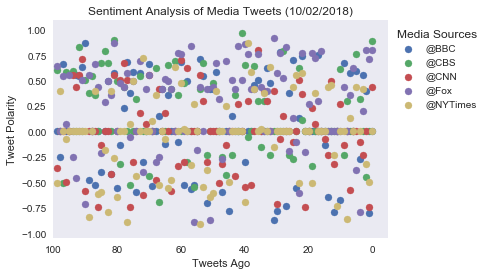

In [64]:
colors = {"BBC": "lightblue","CBS":"green","CNN":"red", "Fox":"blue","nytimes": "yellow"}

plt.xlim(100, -5)

for user in target_users:
    dataframe = news_sentiments.loc[news_sentiments["User"] == user]
    plt.scatter(dataframe["Tweets Ago"],dataframe["Compound"],label = user)

plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.title("Sentiment Analysis of Media Tweets (%s)" % (time.strftime("%m/%d/%Y")))
plt.legend(bbox_to_anchor = (1,1), title = "Media Sources")
plt.grid()
plt.savefig("Sentiment Analysis of Media Tweets")
plt.show()

In [65]:
avg_sentiment = news_sentiments.groupby("User")["Compound"].mean()
avg_sentiment

User
@BBC        0.060679
@CBS        0.152432
@CNN        0.002404
@Fox        0.274161
@NYTimes   -0.041265
Name: Compound, dtype: float64

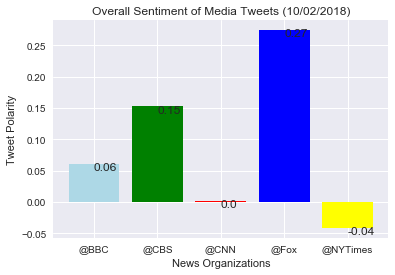

In [66]:
x_axis = np.arange(len(avg_sentiment))
xlabels = avg_sentiment.index

count = 0

for sentiment in avg_sentiment:
    plt.text(count, sentiment-.01, str(round(sentiment,2)))
    count = count + 1

plt.xlabel("News Organizations")
plt.ylabel("Tweet Polarity")
plt.title("Overall Sentiment of Media Tweets (%s)" % (time.strftime("%m/%d/%Y")))
plt.bar(x_axis, avg_sentiment, tick_label = xlabels, color = [ "lightblue", "green", "red", "blue","yellow"])
plt.savefig("Overall Sentiment of Media Tweets")
plt.show()